<a href="https://colab.research.google.com/github/vibferreira/machine_learning_2021_UBS/blob/main/BARBOSA_FERREIRA_Lab1_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB SESSION 1 - DECISION TREES

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

file = '/content/gdrive/MyDrive/vitoria.barbosa.ferreira@usp.br 2021-08-09 21:44/Master/Copernicus - 15 01/Classes/3 semester/Machine Learning/Practice/Decision Trees/penguins.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Utils

In [ ]:
#conda install -c conda-forge scikit-learn, pandas 

In [ ]:
#conda install seaborn

## Ex 1: introduction to classification trees

We work with the palmerpenguins dataset (see the dataset document https://allisonhorst.github.io/palmerpenguins/).
Before to start, we: 
 - load the data and look at them (display the dimension and some descriptive statistics) 
 - select the variables that we will use in the exercise, 
 - visualize the data.
 - split the dataset into a training and testing dataset (use the value 0 for the random seed) 

In [ ]:
# (1) Load the data and display the dimension and a brief statistics summary
import pandas as pd # data analysis
penguins = pd.read_csv(file) 
print(penguins.head())
print(penguins.shape)
penguins.describe()

  species     island  bill_length_mm  ...  body_mass_g     sex  year
0  Adelie  Torgersen            39.1  ...         3750    male  2007
1  Adelie  Torgersen            39.5  ...         3800  female  2007
2  Adelie  Torgersen            40.3  ...         3250  female  2007
3  Adelie  Torgersen            36.7  ...         3450  female  2007
4  Adelie  Torgersen            39.3  ...         3650    male  2007

[5 rows x 8 columns]
(333, 8)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
# (2) Select the variables that we will use in the exercise
penguins_classif=penguins[["species","bill_length_mm","bill_depth_mm"]]
penguins_classif.head(10)

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,36.7,19.3
4,Adelie,39.3,20.6
5,Adelie,38.9,17.8
6,Adelie,39.2,19.6
7,Adelie,41.1,17.6
8,Adelie,38.6,21.2
9,Adelie,34.6,21.1


In [ ]:
#penguins_classif.dtypes
# Convert the variable species as categorical variables
#penguins_classif["species"]= pd.Categorical(penguins_classif["species"])
#penguins_classif.dtypes
#penguins_classif.head(10)

In [ ]:
target_column = "species" # The response variable that we will consider
features_columns = ["bill_length_mm", "bill_depth_mm"] # The predictors/features used to predict the target

In [ ]:
#species_code = pd.to_numeric(penguins_classif[["species"]])
#penguins_classif["species"]
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder() # enconding the labels to a numeric format to later associate this with the formula
penguins_classif["species_code"] = ord_enc.fit_transform(penguins_classif[["species"]])
penguins_classif[["species", "species_code"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,species,species_code
0,Adelie,0.0
1,Adelie,0.0
2,Adelie,0.0
3,Adelie,0.0
4,Adelie,0.0
...,...,...
328,Chinstrap,1.0
329,Chinstrap,1.0
330,Chinstrap,1.0
331,Chinstrap,1.0


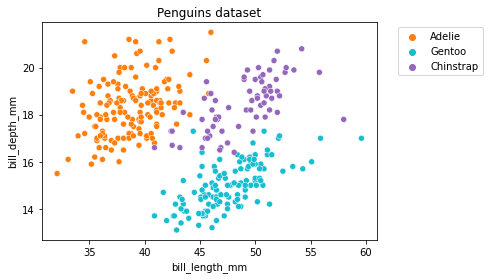

In [ ]:
# (3) Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt
palette = ["tab:orange", "tab:cyan", "tab:purple"]
ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Penguins dataset")

In [ ]:
# (4) Split the dataset into train and test dataset
from sklearn.model_selection import train_test_split
data, target = penguins_classif[features_columns], penguins_classif[target_column]
data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0, test_size=0.25)

In [ ]:
print(data_test.shape);print(data_train.shape)

(84, 2)
(249, 2)


In [ ]:
data

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6
...,...,...
328,55.8,19.8
329,43.5,18.1
330,49.6,18.2
331,50.8,19.0


**Question 1. Fit a classification tree to explain species by the length and the width of the bill and draw it. Your tree will fit the train set and will have a maximum depth of 2 (use also random_state=0).**

*random_state: parameter that controls the randomness of the estimator, used if the improvement of the criterion is identical for several splits then one split has to be selected at random).*

|--- feature_1 <= 16.35
|   |--- feature_0 <= 39.30
|   |   |--- class: Adelie
|   |--- feature_0 >  39.30
|   |   |--- class: Gentoo
|--- feature_1 >  16.35
|   |--- feature_0 <= 44.25
|   |   |--- class: Adelie
|   |--- feature_0 >  44.25
|   |   |--- class: Chinstrap



[Text(279.0, 679.5, 'bill_depth_mm <= 16.35\ngini = 0.644\nsamples = 249\nvalue = [104, 53, 92]\nclass = Adelie'),
 Text(139.5, 407.69999999999993, 'bill_length_mm <= 39.3\ngini = 0.065\nsamples = 89\nvalue = [3, 0, 86]\nclass = Chinstrap'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Adelie'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 86\nvalue = [0, 0, 86]\nclass = Chinstrap'),
 Text(418.5, 407.69999999999993, 'bill_length_mm <= 44.25\ngini = 0.49\nsamples = 160\nvalue = [101, 53, 6]\nclass = Adelie'),
 Text(348.75, 135.89999999999998, 'gini = 0.092\nsamples = 103\nvalue = [98, 5, 0]\nclass = Adelie'),
 Text(488.25, 135.89999999999998, 'gini = 0.277\nsamples = 57\nvalue = [3, 48, 6]\nclass = Gentoo')]

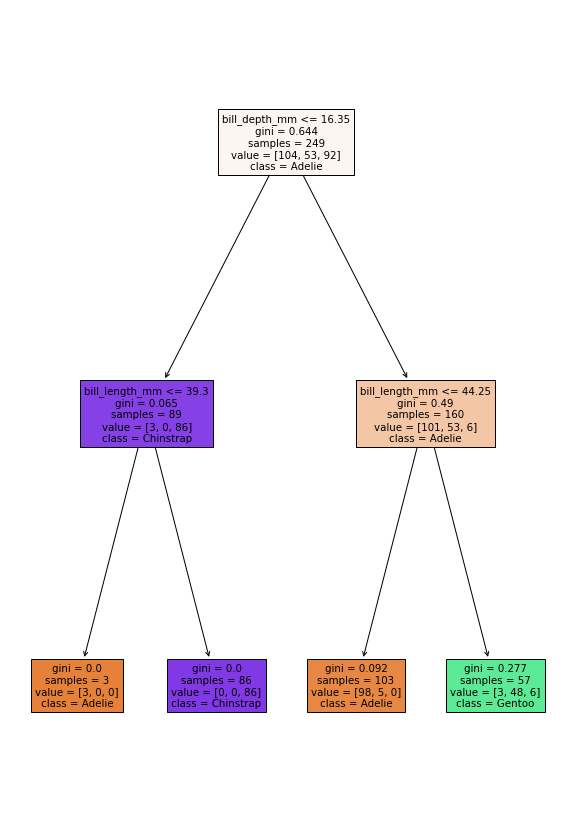

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
## Help: 
## - import DecisionTreeClassifier and plot_tree from sklearn.tree
## - see the documentation of the module Tree of scikit-learn : https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier, plot_tree # module importation
# Use the name tree_clf for your tree classifier. 

# Step 1: create the object tree_clf, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=2, random_state=0) #important to control the randomness of your training set to be able to reproduce

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree_clf.fit(data_train, target_train)

# Step 3: plot the tree (text representation)
from sklearn import tree # importation of the module tree  
text_representation=tree.export_text(tree_clf)
print(text_representation)

# Step 4: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree.plot_tree(decision_tree=tree_clf, feature_names=data.columns, class_names=target.unique(), filled=True)

**Question 2. Based on the plot of the tree, write the prediction $f_n(\mathbf x)$ associated to the tree for a new observation $\mathbf x \in \mathbb R^2$.**

 $ f_n (\mathbf x) = 0 \times 1_{\lbrace x_1 \leq 16.35, x_2 \leq 39.3 \rbrace} + 0 \times 0_{\brace x_1 \leq 16.35, x_2 \leq 44.25 \rbrace} + 2 \times 1_{\lbrace x_1 \leq 16.35,x2 >39.3 \rbrace} + 1 \times 1_{\lbrace x_1 > 16.35,x2>44.25 \rbrace}$


**Question 3. Consider a penguins with a bill measuring 45mm (length) and 18mm (depth). What is the probability that this penguins belongs to the Adelie familly, $\mathbf P(Species =Adelie \, \vert \, x_1 = 45, x_2=18)$ ?**

In [ ]:
##----- You can write your answer here or on a paper as well-----##
rate_of_x1=3/57
print('Porbabilitiy of being Adelie: ', rate_of_x1)

Porbabilitiy of being Adelie:  0.05263157894736842


**Question 4. Plot the data and the partition associated to the tree. (Complete the command below by filling in the gaps '...'.)**

Text(0.5, 1.0, 'Penguins dataset')

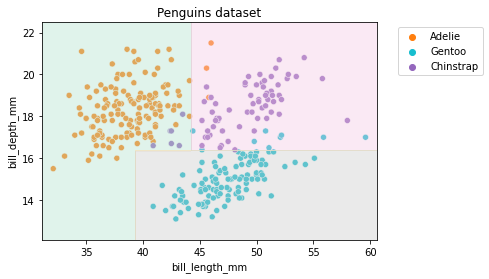

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

import numpy as np

# A function to plot the partition associated to a decision tree model
def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="Pastel2")

    return ax

# Define the colors used
palette = ["tab:orange", "tab:cyan", "tab:purple"]

ax = sns.scatterplot(data=penguins_classif, x=features_columns[0], y=features_columns[1],hue=target_column, palette=palette)# Define the grid : the data space 
plot_decision_function(tree_clf,range_features, ax=ax) # display the tree partition
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # graphical options
plt.title("Penguins dataset")# graphical options


In [ ]:
range_features

{'bill_depth_mm': (12.1, 22.5), 'bill_length_mm': (31.1, 60.6)}

**Question 4. Have a look at the tree structure (read the scikit-learn documentation and specially the section *Understanding the decision tree structure*). Print the following tree parameters: the split variables, the thresholds, the id of each node, the number of observations in each nodes and the impurity value in each node.**

In [ ]:
##------- Complete the command below -------##
## Help: 
## https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=sklearn%20tree%20_tree%20tree
# Look at the object: tree_clf.tree_

tree_clf.tree_.feature # give the ordered list of the split variables. 
#Do the same for the thresholds, the id of each node, the number of observations in each nodes and the impurity value in each node
print(f"""Threshold: {tree_clf.tree_.threshold}\n
Number of nodes: {tree_clf.tree_.n_node_samples}\n
ID: {tree_clf.tree_.children_left, tree_clf.tree_.children_right}\n
Impurity: {tree_clf.tree_.impurity}""")

Threshold: [16.34999943 39.30000114 -2.         -2.         44.25       -2.
 -2.        ]

Number of nodes: [249  89   3  86 160 103  57]

ID: (array([ 1,  2, -1, -1,  5, -1, -1]), array([ 4,  3, -1, -1,  6, -1, -1]))

Impurity: [0.64373155 0.06514329 0.         0.         0.49039062 0.0923744
 0.27700831]


**Question 4. Predict the class of each observation of the test sample by using the tree and display the confusion matrix. Explain it. How many observations are misclassified?**

The model made a class prediction based on the test dataset, which was not previously seen before. The prediction is the output of the majority of votes for each target class in each node of the tree. 80 out of 84 predictions are correctly classified. The classes Gento and Chinstrap had the highest rate of confusion.

In [ ]:
print(tree_clf.predict(data_test))

['Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap']


Acurracy 0.9523809523809523


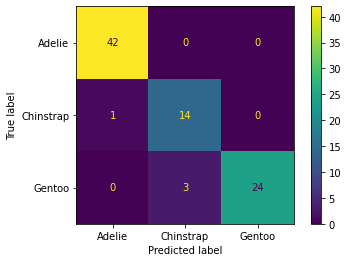

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
predictions_test = tree_clf.predict(X=data_test) # Calculate the predictions for the test set
# print(predictions_test) # Print these predictions

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # import the module to display confusion matrix

cm = confusion_matrix(y_true=target_test, y_pred=predictions_test) # define the confusion matrix object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_) # display the confusion matrix
disp.plot() 

accuracy = tree_clf.score(X=data_test,y=target_test)
print('Acurracy',accuracy) # calculate the accuracy

**Question 5. Fit a tree with a maximum depth of 5 (random_state=0). Draw the tree and compute the accuracy of this second tree on the test set. Compare the accuracy between the two trees.**

The model with a depth of 5 generated a better accuracy then the previous one. However, this model is more complex and might not generalise well to predict never seen data.

0.9761904761904762


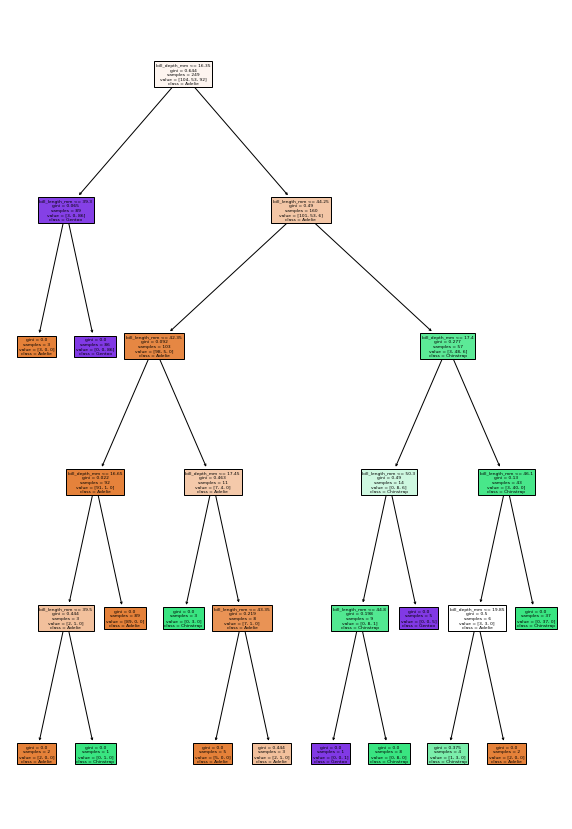

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

# Step 1: create the object tree_clf_d5, it is a DecisionTreeClassifier object with randomstate=0 and max_depth=2
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf_d5 = DecisionTreeClassifier(random_state=0,max_depth=5)

# Step 2: build the tree on the train set by indicating the input data and the traget variable 
tree_clf_d5.fit(X=data_train,y=target_train)

# # Step 3: plot the tree (plot the figure)
fig = plt.figure(figsize=(10,15))
tree_plot_d5 = tree.plot_tree(decision_tree=tree_clf_d5,feature_names=data.columns,class_names=tree_clf.classes_,filled=True)

# # Step 4: compute the accuracy of the tree using the test set
predictions_test_d5 = tree_clf_d5.predict(X=data_test)
accuracy_d5 = tree_clf_d5.score(X=data_test,y=target_test);print(accuracy_d5)

**Question 6: TREE PRUNING - As we don't know what is the best size of the tree, we will apply the cost-complexity pruning method.**
   - **a) Fit the maximum tree (don't choose any value for max_depth and use random_state=0)**
   - **b) Get the sequence of values for the cost complexity parameter (ccp_alpha)**
   - **c) Train a decision tree for each value in the sequence and store the number of nodes and the depth of each tree.**
   - **d) Compute the accuracy on both the train set and test set for each tree.**
   - **e) Draw the following plots :**
      **Plot 1 = node_count vs ccp_alpha,**
      **Plot 2 = depth vs ccp_alpha**
      **Plot 3 = accuracy vs ccp_alpha for training and testing sets.**

In [ ]:
## (a) Fit the maximum tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_tree_clf = DecisionTreeClassifier(random_state=0)

max_tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
## (b) Get the sequence of values for the cost complexity parameter (ccp_alpha)
path = max_tree_clf.cost_complexity_pruning_path(X=data_train, y=target_train)
ccp_alphas= path.ccp_alphas; print(ccp_alphas)

[0.         0.00301205 0.00351406 0.00397241 0.0060241  0.00713967
 0.01036705 0.01161908 0.01692831 0.02328415 0.2134878  0.30533696]


In [ ]:
## c) Train a decision tree for each value in the sequence 
##    and store node_count and max_depth
tree_clfs = []
for alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    tree_clf.fit(data_train, target_train)
    tree_clfs.append(tree_clf)


tree_clfs = tree_clfs[:-1] #a list including all the decision trees for all alpha values
ccp_alphas = ccp_alphas[:-1] #a list including all alpha values


node_counts = [tree_clf.tree_.node_count for tree_clf in tree_clfs];print(node_counts)#a vector with the number of nodes for all decision trees 
depth = [tree_clf.tree_.max_depth for tree_clf in tree_clfs];print(depth)#a vector with the depth for all decision trees 

[33, 29, 25, 21, 19, 17, 15, 11, 7, 5, 3]
[7, 6, 5, 5, 5, 4, 4, 4, 2, 2, 1]


In [ ]:
## (d) Compute the accuracy on both the train set and test set for each tree.
train_acc = [tree_clf.score(X=data_train, y=target_train) for tree_clf in tree_clfs] #;print(train_acc)
test_acc = [tree_clf.score(X=data_test, y=target_test) for tree_clf in tree_clfs] #;print(test_acc)

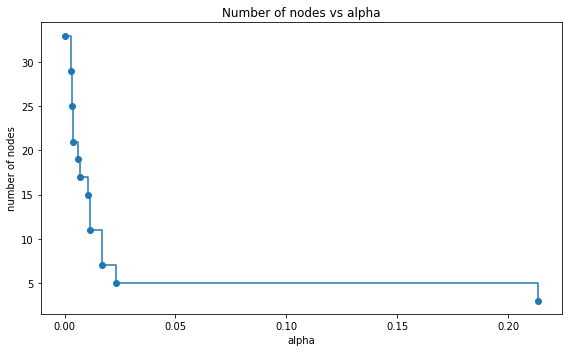

In [ ]:
## (e) Plot 1
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
fig.tight_layout()

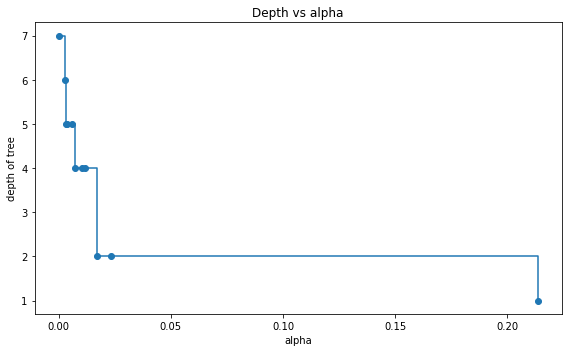

In [ ]:
## (e) Plot 2
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")
fig.tight_layout()

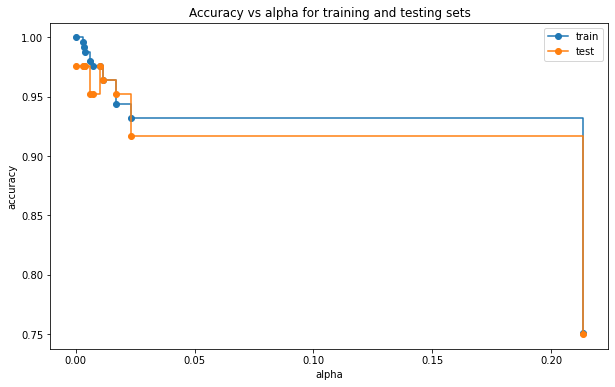

In [ ]:
## (e) Plot 3
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ccp_alphas, train_acc, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc, marker='o', label="test",
        drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.legend()
plt.show()

In [ ]:
df = pd.DataFrame(data={'test_accuracy':test_acc,'alpha':ccp_alphas})
df.sort_values(by=['test_accuracy'], ascending=False)

,test_accuracy,alpha
0,0.976190,0.000000
1,0.976190,0.003012
2,0.976190,0.003514
3,0.976190,0.003972
6,0.976190,0.010367
7,0.964286,0.011619
4,0.952381,0.006024
5,0.952381,0.007140
8,0.952381,0.016928
9,0.916667,0.023284


**Question ... Based on Plot 3, what final tree do you select ? Justify your choice. What is the ccp_alpha value for this tree ?**  
**Next, plot the final tree. After, on another plot, plot the data and superimpose the partition associated to the final tree.** 

The alpha values represents the cost of cutting the tree. When the cost is zero, the tree is cutted the most, fitting better the training set. As the cost of cutting the tree increases, the tree is less cutted, therefore more generic, fitting better the testing set. The ccp value for this tree is 0.010367, when the accuracy on the testing set slightly outperform the accuracy on the training set. 

(array([0, 1, 2, 3, 6]),)
0.010367049593723726


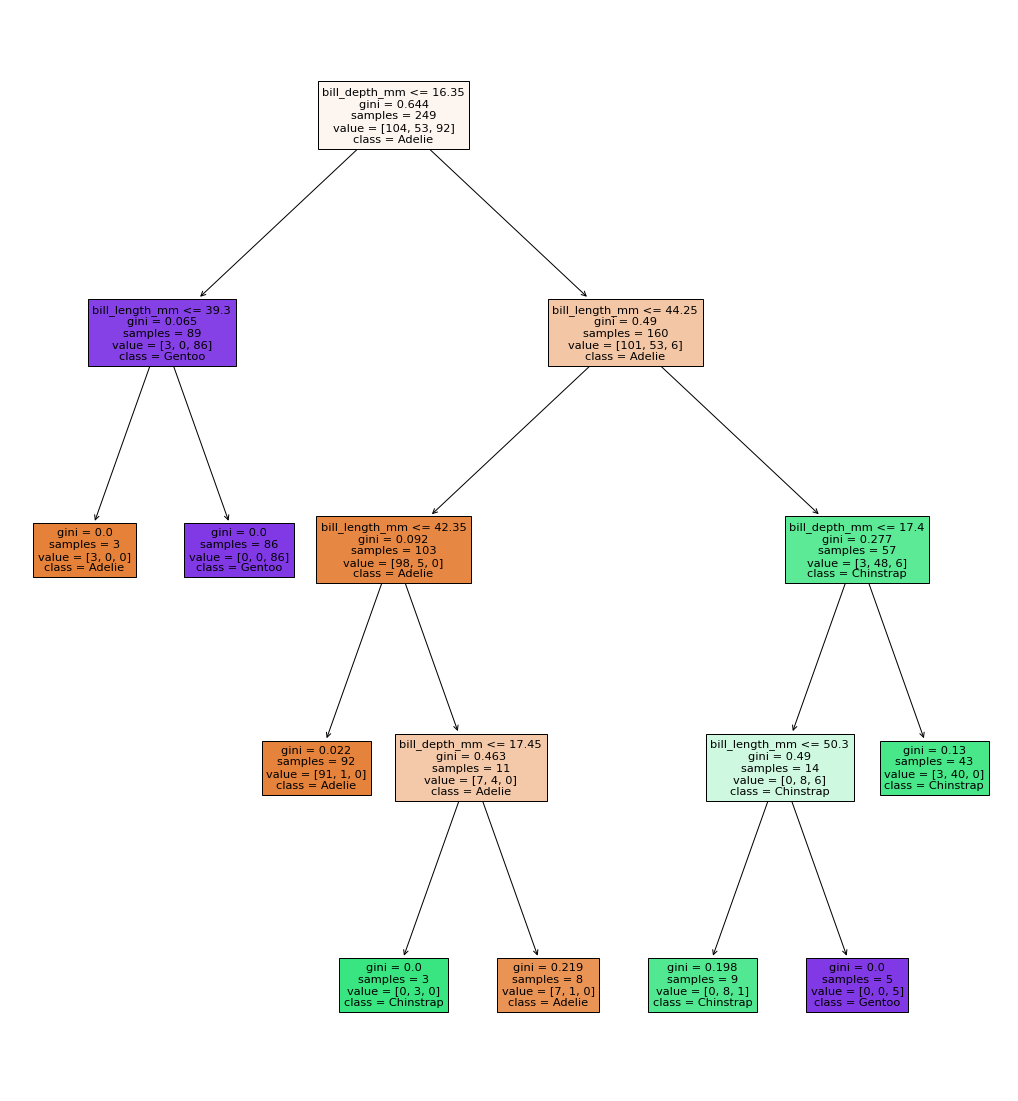

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

index=np.where(test_acc == max(test_acc)) # find the index for the alpha values that maximize the accuracy on the test set
print(index)
best_alpha=ccp_alphas[6]; print(best_alpha)# choose the 'best alpha' (There are several values for alpha that maximize the accuracy and the test set. 
#So the best value for alpha is the one that is associated to the smallest tree and associate to the simplest tree)

final_tree_clf = tree_clfs[6] #find the final tree into the sequence tree_clfs of optimal trees 
fig = plt.figure(figsize=(18,20))
final_tree_plot= tree.plot_tree(final_tree_clf,feature_names=features_columns,class_names=final_tree_clf.classes_,filled=True)# display the final tree

## Ex 2: introduction to regression trees

We work with the iris dataset (see the dataset documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
Before to start, we: 
 - load the data and look at them (dimension, attributes, statistic summary), 
 - select the variables that we will use in the exercise (predictor/feature = petal length, target = petal length), 
 - plot the data (x-axis = sepal length, y-axis = petal length).
 - split the dataset into a training and testing dataset (use random.state=0 and test_size=0.3)

In [ ]:
# (1) Load the data and look at them (dimension, attributes, statistic summary)
import pandas as pd # data analysis
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# (2) Select the variables that we will use in the exercise

X = pd.DataFrame(iris.data[:,2],columns=['Petal length'])# Petal length
Y = pd.DataFrame(iris.data[:,3], columns=['Petal width']) # Petal width
data = pd.concat([X,Y], axis=1)
X_column=['Petal length']
data.head(10)

,Petal length,Petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

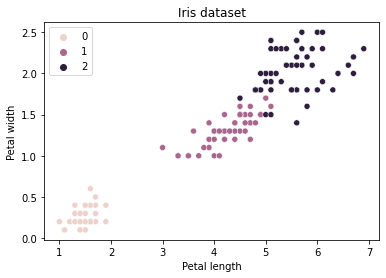

In [ ]:
# (3) Plot the data

import seaborn as sns
ax2 = sns.scatterplot(data=data, x="Petal length", y="Petal width", hue=iris.target)
_=plt.title('Iris dataset') 

In [ ]:
# (4) Split the dataset into train and test dataset (size of the test set = 30% of the data, random_state=0)

##------- Complete the command below by filling in the gaps '...'.-------##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

**Question 1. Fit a regression tree and a linear model to explain the petal width by the petal length. Plot the tree. Your tree will be fit on the train set and will have a maximum depth of 3.**

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


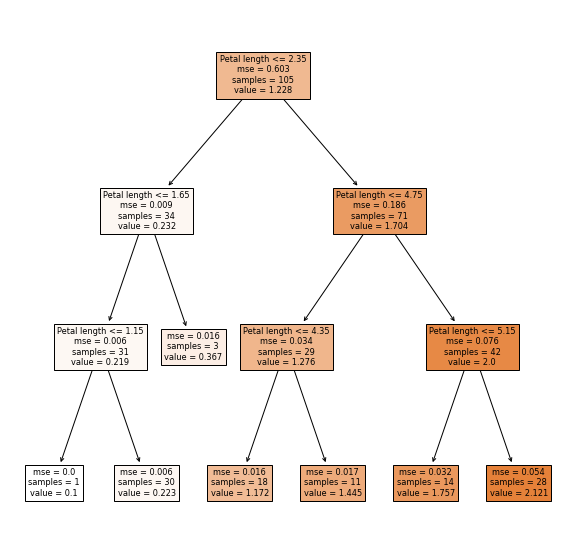

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=3)

lr= linear_regression.fit(X=X_train, y=Y_train)
tr=tree_reg.fit(X=X_train, y=Y_train)


plt.figure(figsize=(10,10))
plot_tree(tr, filled=True, class_names=tr.classes_, feature_names=X_column)
plt.show()

print(tr.decision_path)


**Question 2. Based on the plot of the tree, write the prediction function $f$ associated to the regression tree.**

$ \mathbf x= Pental Length$

$ f_n (\mathbf x) = [0.232, 1.704]_{\lbrace x_1 \leq 2.35\rbrace} + [0.232,1.704]_{\lbrace x_1 >2.35 \rbrace} + [0.219,0.367]_{\lbrace x_1 \leq 1.65 \rbrace} + [1.276,2.0]_{\lbrace x_1 \leq 4.75 \rbrace} + [0.1,0.223]_{\lbrace x \leq 1.15 \rbrace} + [1.172,1.445]_{ \lbrace x \leq 4.35 \rbrace} + [1.757,2.121]_{\lbrace x \leq 5.15 \rbrace}$

**Question 3. Compute the predictions of both models on the test set.** 

In [ ]:
##---- Write your answer ----##
y_pred_lr=lr.predict(X_test)
y_pred_tr=tr.predict(X_test)

**Question 4. Display the data using a scatter plot and superimpose as two lines the predictions of both the models.** 

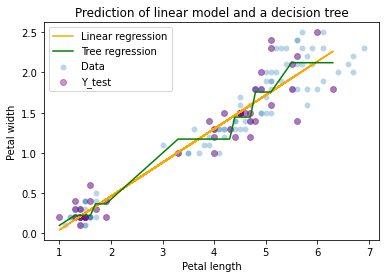

In [ ]:
##------- Complete the command below by filling in the gaps '...'.-------##
X_test_sorted= X_test.sort_values(by='Petal length')
ax2=sns.scatterplot(data=data,x="Petal length", y="Petal width",label='Data',alpha=0.3)
plt.scatter(X_test,Y_test, label = 'Y_test', c='purple',alpha=0.4)
plt.plot(X_test, y_pred_lr,label="Linear regression",c='orange')
plt.plot(X_test_sorted, np.sort(y_pred_tr),label="Tree regression", c='green')
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

**Question 5. Compute the accuracy for both the models. Interpret the results.**

The accuracy score for Logistic Regression is slightly higher than the Decision Tree Regression Model. The main difference between the models is the linearity, since Linear Regression is a linear model and Decision Tree regression is non-linear. Despite of this difference, both models predict with an accuracy of approximately 89%. However, even with a sligth lower accuracy the Decision Tree apparently fit the data distribution better. 

In [ ]:
##---- Write your answer ----##

from sklearn.metrics import mean_absolute_error

accuracy_linear = lr.score(X=X_test,y=Y_test)
print('Linear', 
      '\nAccuracy score:', accuracy_linear*100,
      '\nMSE:', mean_absolute_error(Y_test,y_pred_lr))

accuracy_tree = tr.score(X=X_test,y=Y_test)
print('\nTree', 
      '\nAccuracy score:', accuracy_tree*100,
      '\nMSE:', mean_absolute_error(Y_test,y_pred_tr))

Linear 
Accuracy score: 89.56126694950287 
MSE: 0.1677835275546856

Tree 
Accuracy score: 89.2598010859765 
MSE: 0.16514959114959116
